In [1]:
#lets start with importing necessary libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = r"C:\Users\User\Desktop\Akshay project\Data set\baseball.csv"
import chardet
with open (path,'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))
result

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}

In [3]:
data = pd.read_csv(path,encoding = 'ascii')
data.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [4]:
data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [ ]:
#No null values in any of the columns. Data looks good at first

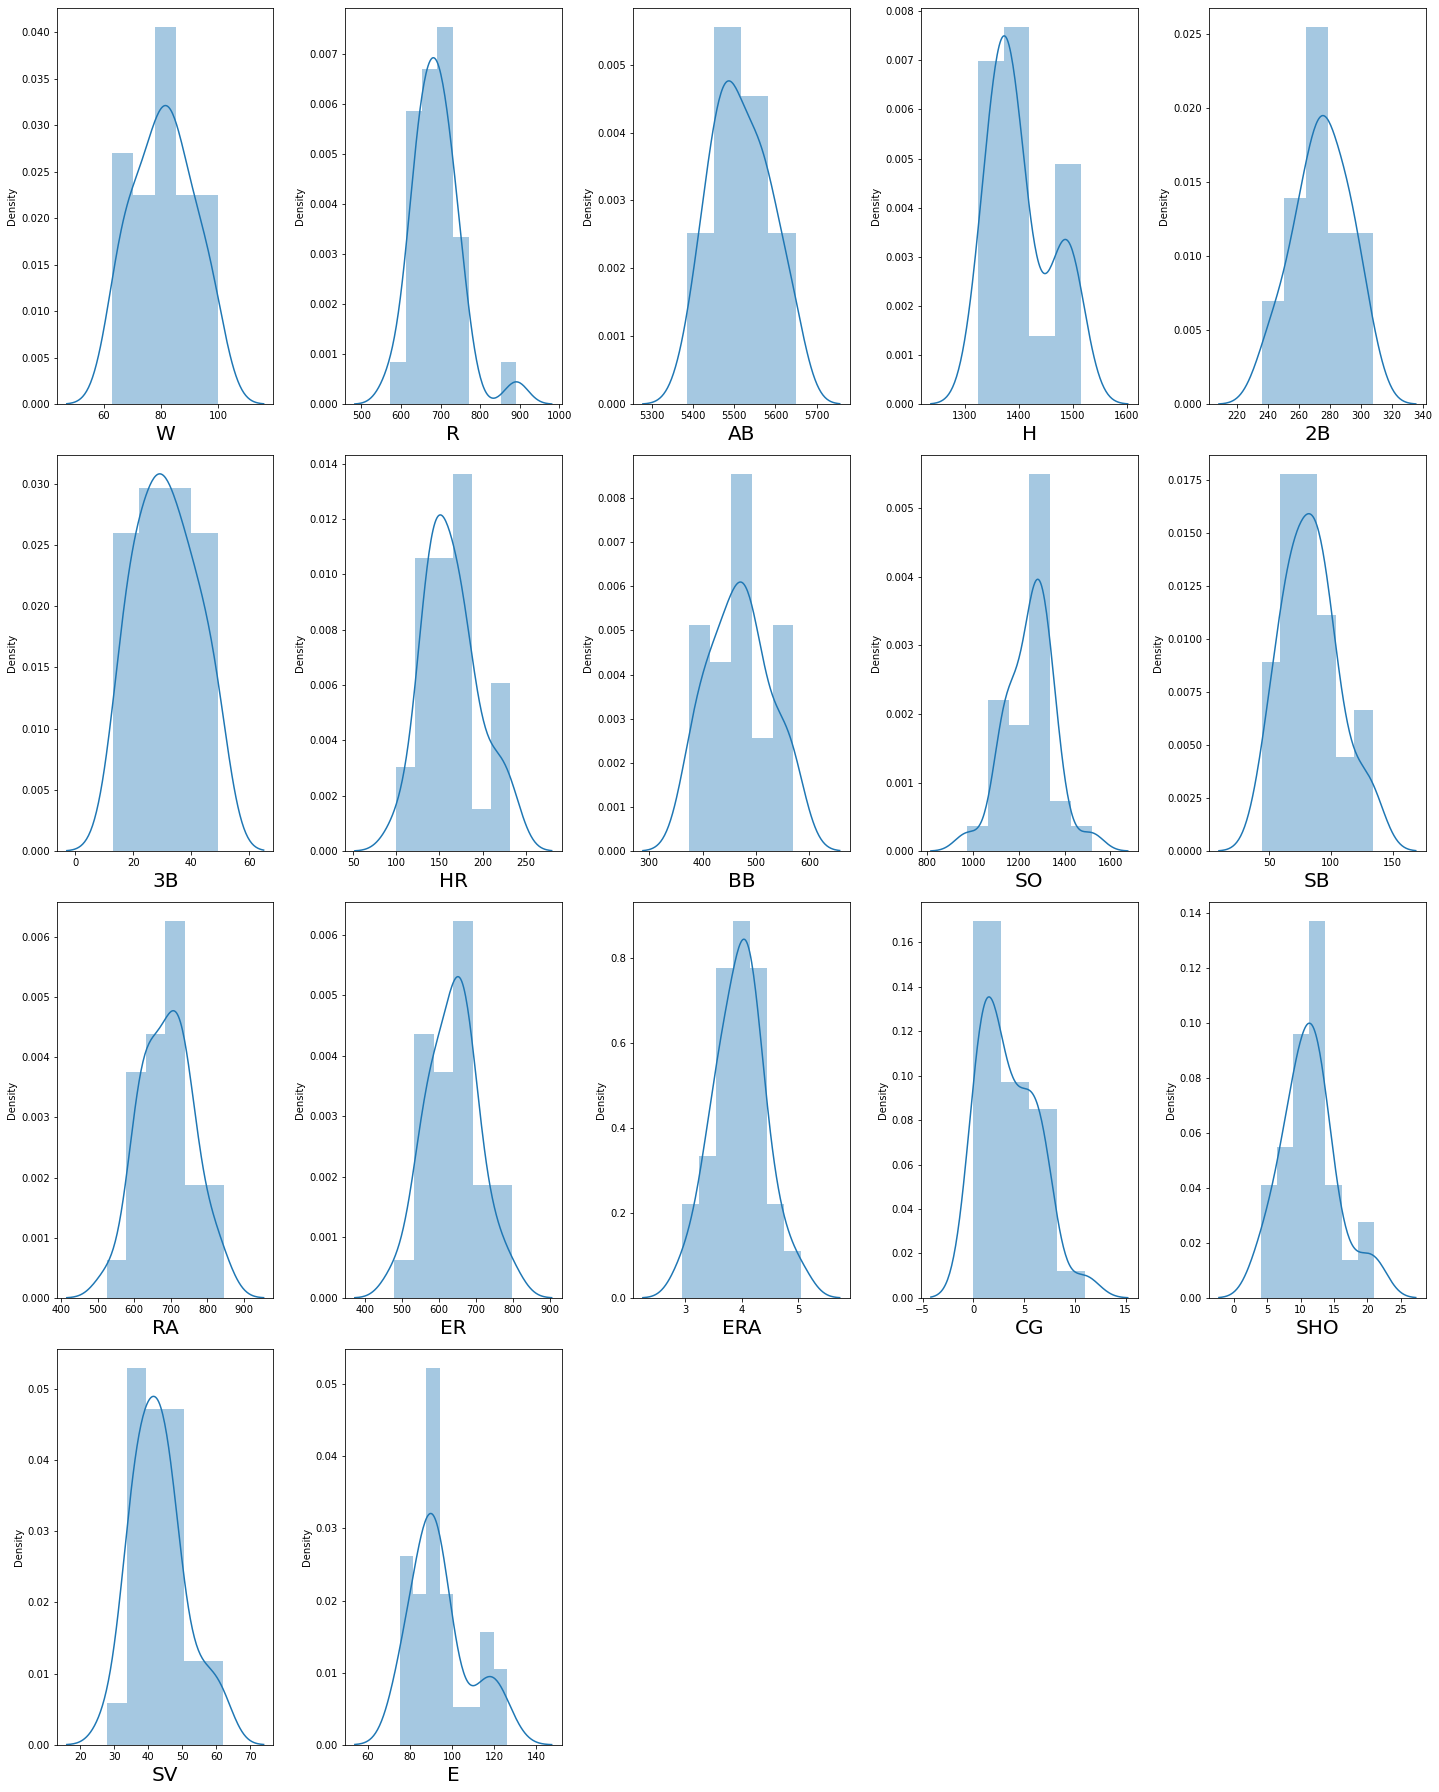

In [5]:
#Lets see how data is distributed for every column
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=17:
        ax= plt.subplot(4,5,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    
    plotnumber+=1
plt.tight_layout()

In [ ]:
#The distribution looks decent and there isnt any skewness in the data, so we can proceed

In [6]:
y = data['W']
X = data.drop(columns = ['W'])

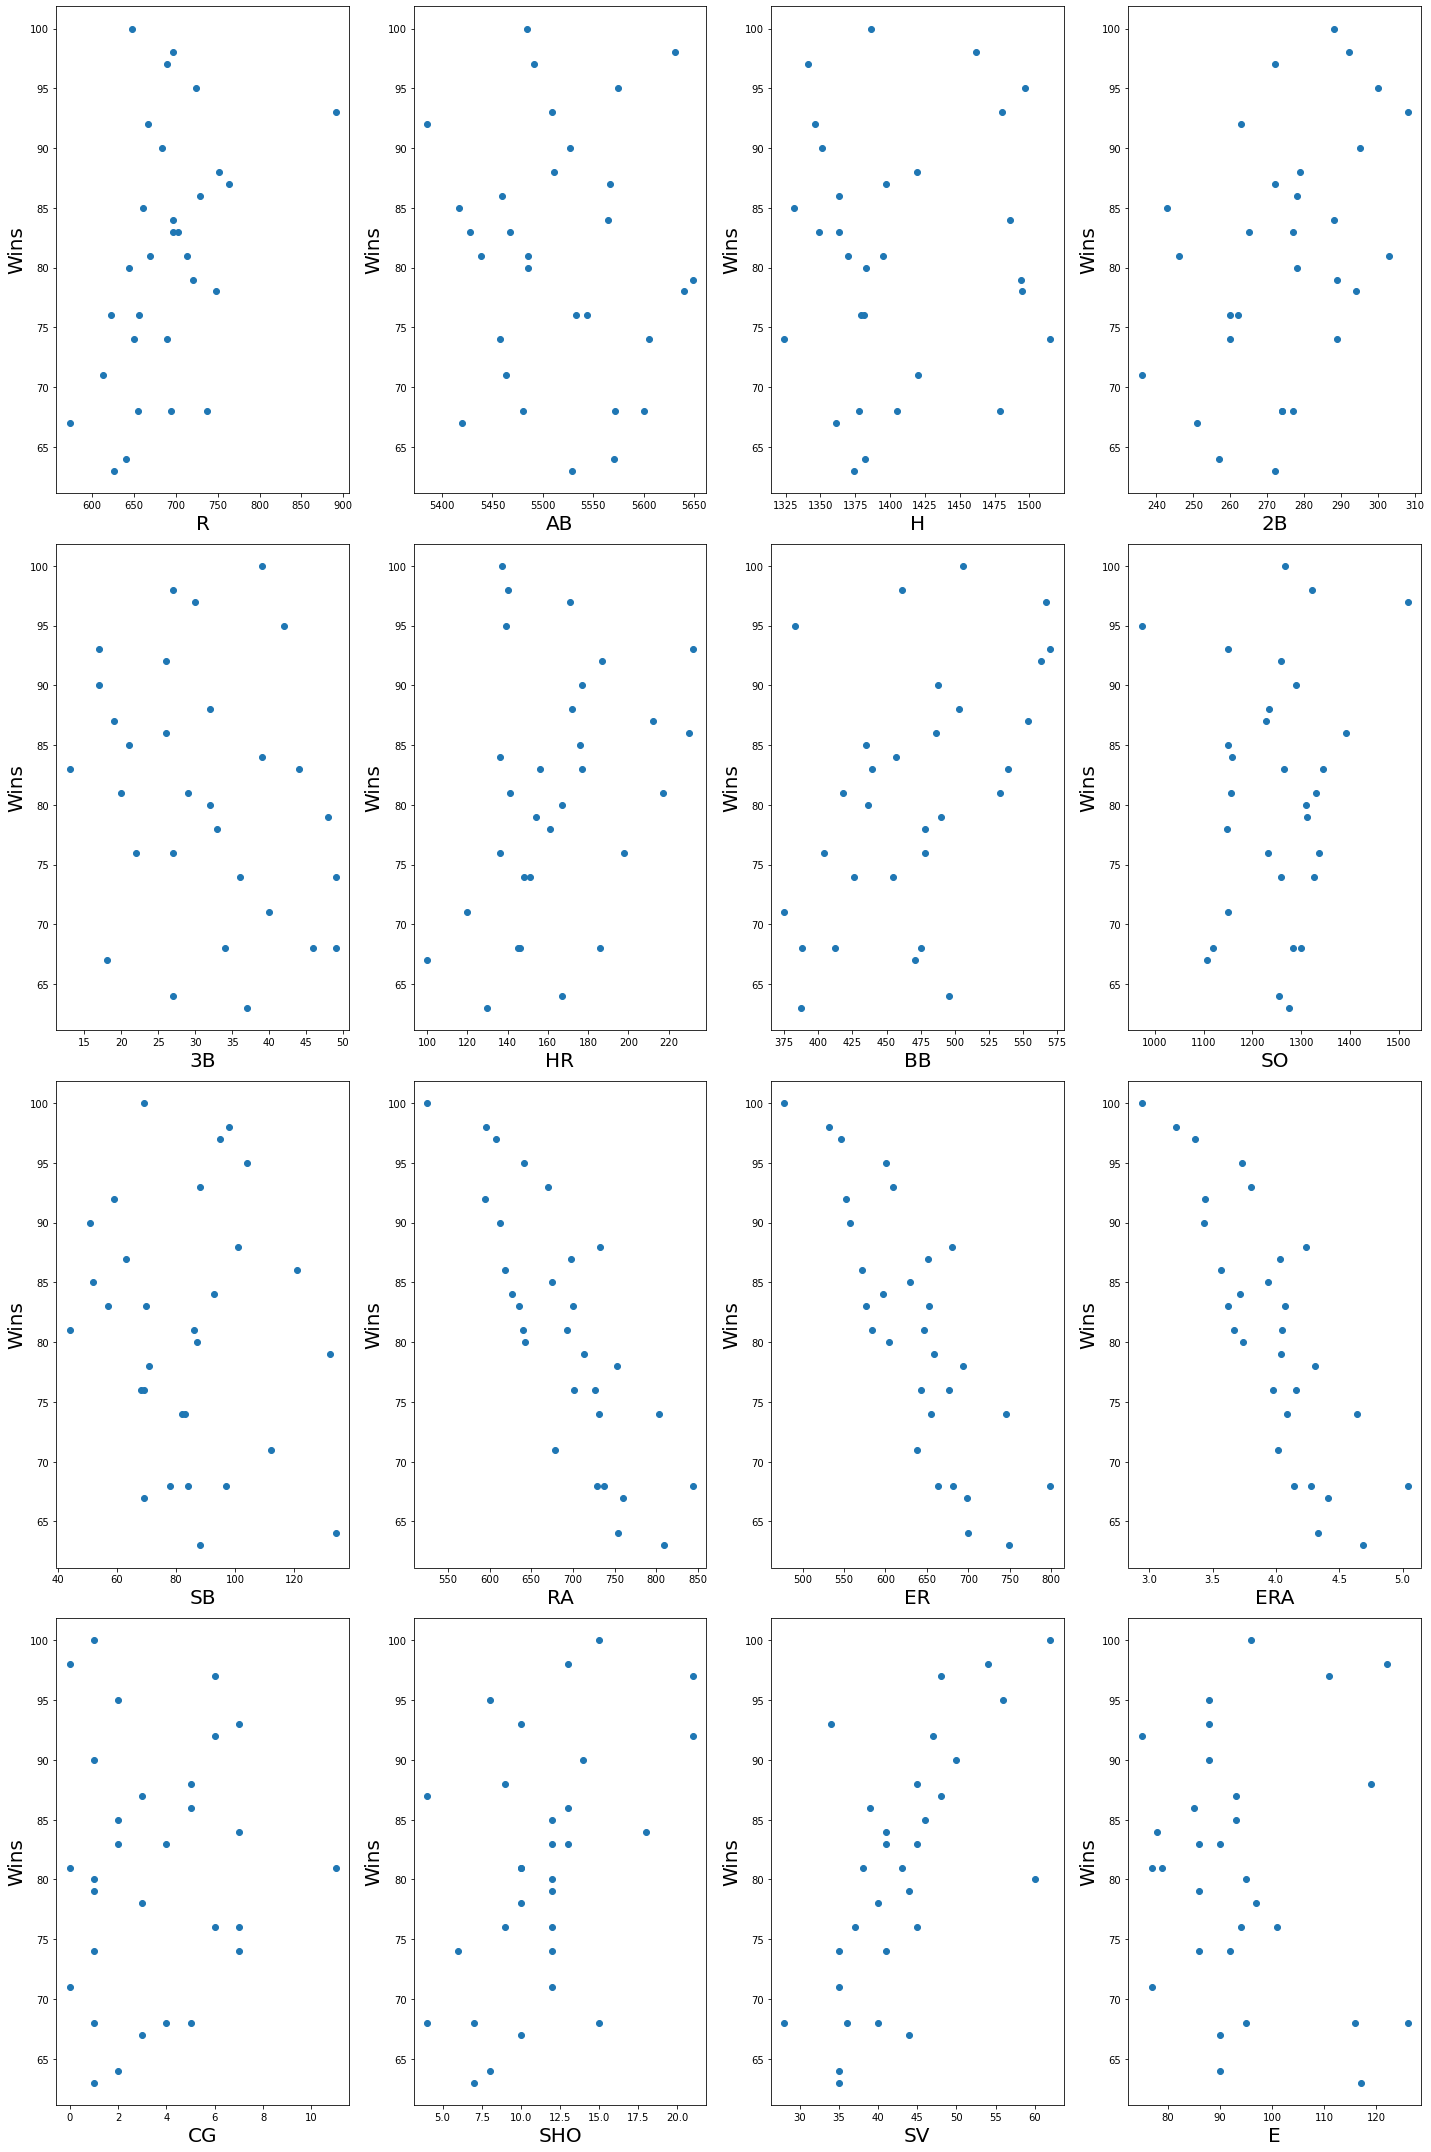

In [9]:
#relationship between feature and label
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=16:
        ax =plt.subplot(4,4,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Wins',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [ ]:
#From above, we can see that RA, ER, ERA show similar trends with respect to wins and shows collinearity
#Lets check the multicollinearity on dependent variables. Before that we should scale our data.

In [10]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [12]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#Lets check the values
vif

,vif,Features
0,11.522370,R
1,13.311532,AB
2,10.070668,H
3,4.019297,2B
4,3.294146,3B
5,10.079902,HR
6,3.806098,BB
7,2.652401,SO
8,2.102684,SB
9,191.839155,RA


In [ ]:
#We see that there is multicolleanirity, so we will drop few columns which are not necessary to feed the model

In [13]:
X = data.drop(columns=['W','AB','ER'])
y = data['W']

In [14]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [15]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#Lets check the values
vif

,vif,Features
0,9.069939,R
1,4.357233,H
2,3.701410,2B
3,3.084933,3B
4,6.846293,HR
5,3.776310,BB
6,2.538513,SO
7,1.841326,SB
8,91.644325,RA
9,88.914899,ERA


In [ ]:
#Still RA and ERA has high multicolleanirity

In [16]:
X = data.drop(columns=['W','AB','ER','RA'])
y = data['W']

In [17]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [18]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#Lets check the values
vif

,vif,Features
0,8.942870,R
1,4.222148,H
2,3.504369,2B
3,3.050885,3B
4,6.691513,HR
5,3.247378,BB
6,2.148310,SO
7,1.779038,SB
8,4.912826,ERA
9,2.263493,CG


In [ ]:
#Now the VIF looks much better. So now we can go ahead and train the model

In [39]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=.25, random_state=355)

In [20]:
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [21]:
regression.score(x_train,y_train)

0.9529675728310817

In [22]:
regression.score(x_test,y_test)

0.8058135775995338

In [23]:
y_pred = regression.predict(x_test)

In [24]:
r2_score(y_test,y_pred)

0.8058135775995338

# So we got the test score of 80.58% from the multiple linear regression model

In [ ]:
# Regularization

In [25]:
from sklearn.linear_model import Lasso,LassoCV,Ridge,RidgeCV

In [26]:
#Lasso regularization
#LassoCV will return best alpha and coefficients after performing 10 cross validations
lasscv = LassoCV(alphas = None, cv=10, max_iter = 1000, normalize = True)
lasscv.fit(x_train, y_train)

LassoCV(cv=10, normalize=True)

In [27]:
#best alpha parameter
alpha = lasscv.alpha_
alpha

0.15110470678675278

In [28]:
#now that we have best parameter, lets use lasso regression and see how well our data has fitted
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.15110470678675278)

In [29]:
lasso_reg.score(x_test,y_test)

0.7577552065701204

In [ ]:
#Lasso regression model's score has decreased than that of linear regression model

In [30]:
#using ridge regression model
#RidgeCV will return best alpha and coefficients after performing 10 cross validations
#we will pass an array of random numbers for RidgeCV to select best alpha from them

alphas = np.random.uniform(low=0, high = 10, size=(50,))
ridgecv=RidgeCV(alphas=alphas,cv=10,normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([5.66090805, 7.47872326, 4.41954919, 3.32439456, 5.95030923,
       4.25726936, 9.09167308, 0.99197802, 1.96468684, 0.27163627,
       7.24787936, 6.9599334 , 1.28230291, 4.01607685, 1.95323899,
       2.7845874 , 9.8807478 , 6.15707531, 0.17194121, 2.41951005,
       3.08772303, 4.37665769, 9.2973737 , 2.64761828, 6.88431673,
       9.56310047, 1.15322811, 6.65316834, 6.01179891, 2.86563842,
       7.46496114, 8.99067545, 4.19087432, 1.4092514 , 2.8264829 ,
       1.41604916, 3.96729761, 8.50615037, 4.81671645, 7.01613128,
       8.00524093, 2.52250935, 2.29471864, 1.74807793, 1.644224  ,
       6.75163075, 9.34182541, 9.67220225, 5.61257489, 8.88868223]),
        cv=10, normalize=True)

In [31]:
ridgecv.alpha_

0.17194121215322267

In [32]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.17194121215322267)

In [33]:
ridge_model.score(x_test,y_test)

0.8193534673794913

# So using Ridge regression model, the score has increased. 

In [54]:
import pickle
baseball = 'finalized_model.pickle'
pickle.dump(ridge_model,open(baseball,'wb'))

# Saved the final model